<a href="https://colab.research.google.com/github/asheta66/Data-Science/blob/main/LR_diabetie_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
df =  pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


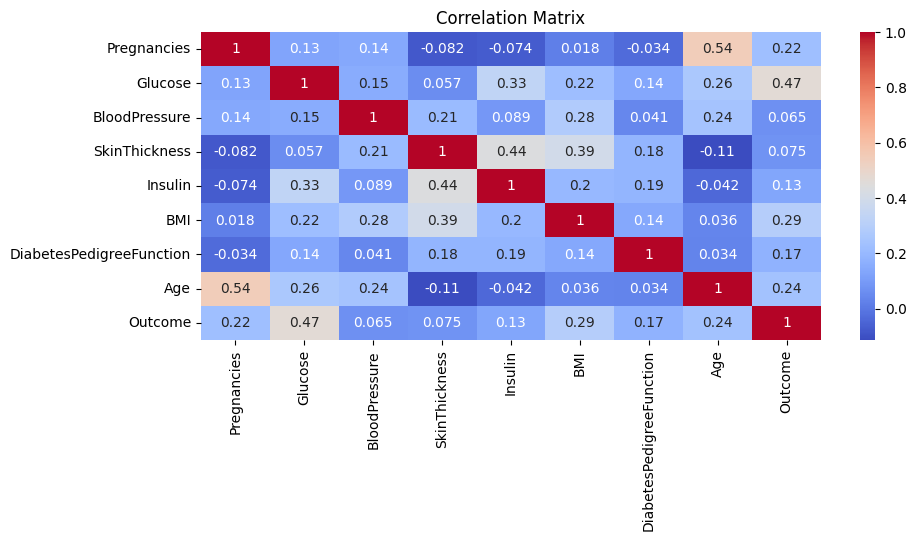

In [9]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,4))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
# X= df[['Pregnancies', 'Glucose', 'BMI', 'Age']]

In [15]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# k = int(input('enter the required number of features to include in my model' ))
selector = SelectKBest(score_func= f_classif, k= 4)
X_new = selector.fit_transform(X, y)

In [16]:
# Assuming you have a SelectKBest object named 'selector' and it's already fitted
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = df.columns[selected_feature_indices]

selected_feature_names

Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state= 42)

In [24]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [26]:
# Calculate the confusion matrices for training and testing
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

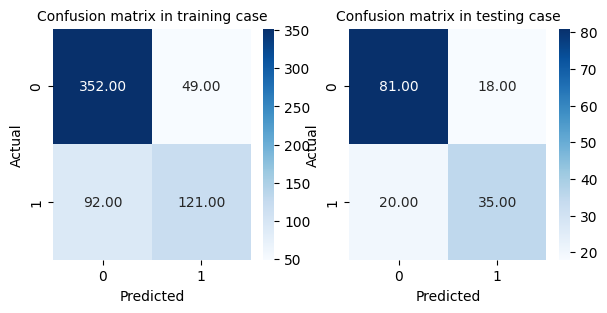

In [36]:
plt.figure(figsize= (7,3))

plt.subplot(1,2,1)
sns.heatmap(cm_train, annot= True, cmap='Blues', fmt='.2f')
plt.title('Confusion matrix in training case', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cm_test, annot= True, cmap='Blues', fmt='.2f')
plt.title('Confusion matrix in testing case', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


In [41]:
# Calculate and display accuracy, precision, specificity, and F1 score
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train= recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print(f'Accuracy: {accuracy_train:.2f}')
print(f'Precision: {precision_train:.2f}')
print(f'Recall: {recall_train:.2f}')
print(f'F1 Score: {f1_train:.2f}')

Accuracy: 0.77
Precision: 0.71
Recall: 0.57
F1 Score: 0.63


In [44]:
# Calculate and display accuracy, precision, specificity, and F1 score
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f'Accuracy: {accuracy_test:.2f}')
print(f'Precision: {precision_test:.2f}')
print(f'Recall: {recall_test:.2f}')
print(f'F1 Score: {f1_test:.2f}')

Accuracy: 0.75
Precision: 0.66
Recall: 0.64
F1 Score: 0.65


In [51]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }

    return pd.DataFrame(metrics, index=[0])

# Example usage:
metrics_train = calculate_metrics(y_train, y_train_pred)
metrics_test = calculate_metrics(y_test, y_test_pred)

# Combine the metrics into a single DataFrame
all_metrics = pd.concat([metrics_train, metrics_test], keys=['Training', 'Testing'])
all_metrics

,,Accuracy,Precision,Recall,F1 Score
Training,0,0.770358,0.711765,0.568075,0.631854
Testing,0,0.753247,0.660377,0.636364,0.648148


The ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model as its discrimination threshold is varied. It is a commonly used tool for evaluating the performance of machine learning classifiers, particularly in medical and diagnostic fields.

Here's how the ROC curve works:

True Positive Rate (TPR) or Sensitivity: This is the ratio of correctly predicted positive instances to the total actual positive instances. In medical terms, it's also called "Sensitivity" or "Recall." It answers the question: "Of all the actual positive cases, how many did we correctly classify as positive?"

TPR = TP / (TP + FN)

False Positive Rate (FPR): This is the ratio of incorrectly predicted negative instances to the total actual negative instances. It answers the question: "Of all the actual negative cases, how many did we incorrectly classify as positive?"

FPR = FP / (TN + FP)

The ROC curve is created by plotting the TPR (Sensitivity) on the y-axis against the FPR on the x-axis at various threshold settings. Each point on the ROC curve represents a different threshold setting for the classifier. The diagonal line (FPR = TPR) represents random guessing, and points above the line indicate better-than-random performance.

The area under the ROC curve (AUC) is a summary measure of the classifier's performance. A model with an AUC of 1.0 is perfect, while an AUC of 0.5 suggests the model performs no better than random chance.

In summary, the ROC curve helps you visualize how well a binary classification model distinguishes between the two classes by showing the trade-off between Sensitivity and Specificity across different threshold settings.

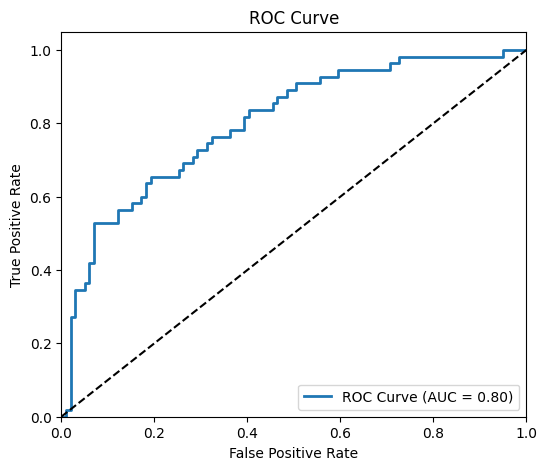

In [53]:
# Calculate and plot the ROC curve
y_prob = LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()